In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
whole_file="https://raw.githubusercontent.com/lavibula/GoldPricePrediction/main/data/data_preparation/data_preparation.csv"
df =pd.read_csv(whole_file)
df

,Date,GOLD_open,GOLD_high,GOLD_low,GOLD_close,copper,crude_oil,DXY,EURUSD,MSCI,NASDAQ,NLR,platinum,RUT,silver,SP500,VIX
0,2023-11-03,1993.5,2011.9,1989.3,1999.2,3.6815,80.51,105.02,1.0732,497.76,13478.28,71.36,944.3,1760.71,23.285,4358.34,14.91
1,2023-11-02,1992.0,1999.2,1986.3,1993.5,3.6725,82.46,106.12,1.0622,487.02,13294.19,72.14,930.6,1714.21,22.846,4317.78,15.66
2,2023-11-01,1993.3,2005.9,1978.2,1987.5,3.6490,80.44,106.88,1.0570,471.85,13061.47,70.98,930.4,1669.70,22.790,4237.86,16.87
3,2023-10-31,2005.6,2017.7,1987.4,1994.3,3.6490,81.02,106.66,1.0578,471.55,12851.24,69.93,944.9,1662.28,22.952,4193.80,18.14
4,2023-10-30,2013.5,2016.8,1999.7,2005.6,3.6585,82.31,106.12,1.0617,481.99,12789.48,68.35,939.9,1647.29,23.396,4166.82,19.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3418,2010-04-08,1150.2,1154.7,1144.4,1152.9,3.5865,85.39,81.53,1.3361,36.19,2436.81,69.42,1717.1,699.64,18.127,1186.44,16.48
3419,2010-04-07,1135.2,1154.2,1133.3,1153.0,3.5975,85.88,81.44,1.3345,37.31,2431.16,69.75,1723.2,699.46,18.199,1182.45,16.62
3420,2010-04-06,1131.9,1139.6,1123.5,1136.0,3.6170,86.84,81.39,1.3400,37.37,2436.81,70.59,1704.5,701.48,17.931,1189.44,16.23
3421,2010-04-05,1122.0,1134.3,1120.8,1133.8,3.6315,86.62,81.09,1.3487,36.98,2429.53,70.44,1709.8,697.65,18.118,1187.44,17.02


**daily return, weekly return, monthly return of gold price**

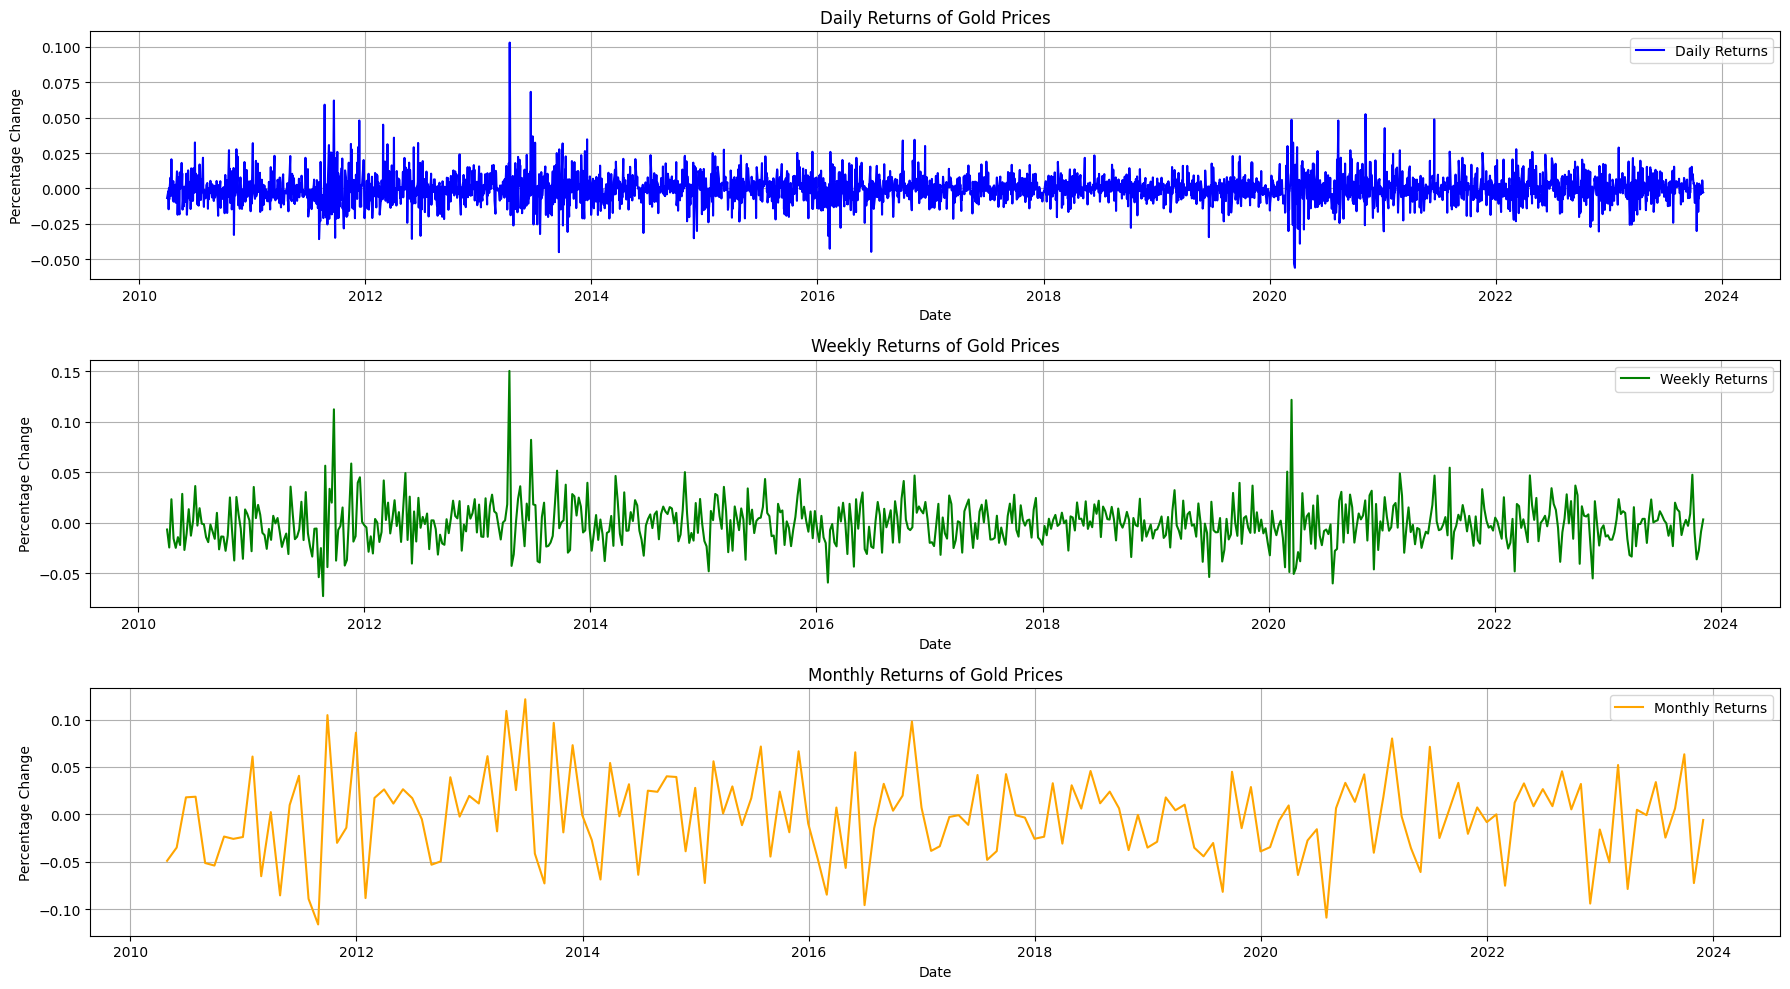

In [3]:

# Assuming 'GOLD_close' is the column containing gold prices
df['date'] = pd.to_datetime(df['Date'])
df.set_index('date', inplace=True)

# Calculate daily returns
daily_return = pd.DataFrame({'daily_close': df['GOLD_close'].pct_change()})

# Resample to weekly returns
weekly_return = daily_return.resample('W').sum()

# Resample to monthly returns
monthly_return = daily_return.resample('M').sum()

# Plotting
plt.figure(figsize=(18, 10))

# Plot daily returns
plt.subplot(3, 1, 1)
plt.plot(daily_return.index, daily_return['daily_close'], label='Daily Returns', color='blue')
plt.title('Daily Returns of Gold Prices')
plt.xlabel('Date')
plt.ylabel('Percentage Change')
plt.legend()
plt.grid(True)

# Plot weekly returns
plt.subplot(3, 1, 2)
plt.plot(weekly_return.index, weekly_return['daily_close'], label='Weekly Returns', color='green')
plt.title('Weekly Returns of Gold Prices')
plt.xlabel('Date')
plt.ylabel('Percentage Change')
plt.legend()
plt.grid(True)

# Plot monthly returns
plt.subplot(3, 1, 3)
plt.plot(monthly_return.index, monthly_return['daily_close'], label='Monthly Returns', color='orange')
plt.title('Monthly Returns of Gold Prices')
plt.xlabel('Date')
plt.ylabel('Percentage Change')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


**Volatility of Assets Over Time**

In [6]:

data=pd.DataFrame()



# Calculate daily returns for gold and other assets
# For gold, we'll use the closing price
data['GOLD_return'] = df['GOLD_close'].pct_change()

# Calculate returns for other assets
for column in df.columns:
    if column not in ['Date', 'GOLD_open', 'GOLD_high', 'GOLD_low', 'GOLD_close', 'GOLD_return']:
        data[column + '_return'] = df[column].pct_change()

# Drop the first row as it will have NaN values for returns
data = data.dropna()

# Calculate rolling standard deviation (volatility) for different time periods
# Assuming the data is daily, we'll use 1 day for daily, 5 days for weekly, and 21 days for monthly
volatility_daily = data.std()
volatility_weekly = data.rolling(window=5).std().mean()
volatility_monthly = data.rolling(window=21).std().mean()
# Prepare the results for display
volatility_results = pd.DataFrame({
    'Daily Volatility': volatility_daily,
    'Weekly Volatility': volatility_weekly,
    'Monthly Volatility': volatility_monthly
})
data['Date'] = pd.to_datetime(df['Date'])

volatility_results.sort_index(inplace=True)
volatility_results

,Daily Volatility,Weekly Volatility,Monthly Volatility
DXY_return,0.004523,0.004062,0.004285
EURUSD_return,0.005418,0.004852,0.005110
GOLD_return,0.010138,0.008874,0.009489
MSCI_return,0.019551,0.015707,0.017001
NASDAQ_return,0.013029,0.010766,0.011427
NLR_return,0.012652,0.010278,0.011069
RUT_return,0.014595,0.012067,0.012761
SP500_return,0.011190,0.008869,0.009460
VIX_return,0.075519,0.066778,0.071858
copper_return,0.014193,0.012807,0.013555


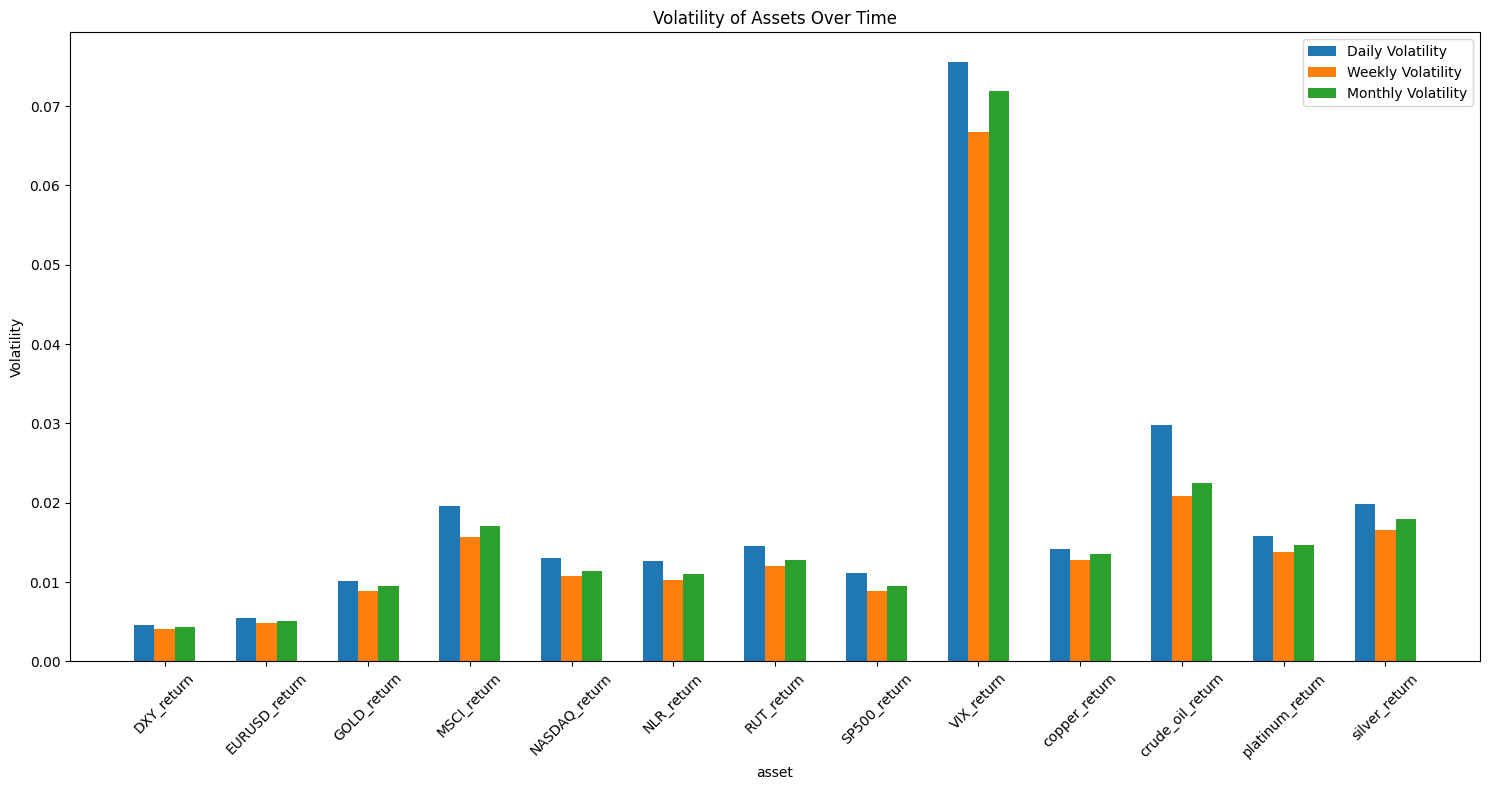

In [25]:
import matplotlib.pyplot as plt

# Assuming 'Date' is in datetime format
data['Date'] = pd.to_datetime(data['Date'])

# Bar chart for volatility
plt.figure(figsize=(15, 8))

# Bar width for better visibility
bar_width = 0.2

# Bar positions
positions_daily = range(len(volatility_results['Daily Volatility']))
positions_weekly = [pos + bar_width for pos in positions_daily]
positions_monthly = [pos + bar_width for pos in positions_weekly]

# Plot bars for each volatility measure
plt.bar(positions_daily, volatility_results['Daily Volatility'], width=bar_width, label='Daily Volatility')
plt.bar(positions_weekly, volatility_results['Weekly Volatility'], width=bar_width, label='Weekly Volatility')
plt.bar(positions_monthly, volatility_results['Monthly Volatility'], width=bar_width, label='Monthly Volatility')
# Set x-axis ticks and labels
plt.xticks(positions_weekly, volatility_results.index,rotation=45)
plt.xlabel('asset')
# Labeling and title
plt.ylabel('Volatility')
plt.title('Volatility of Assets Over Time')
plt.legend()
plt.tight_layout()
plt.show()

Comparing this with other assets:

- *Stock Indices (e.g., NASDAQ, SP500):*
  - NASDAQ has a daily volatility of 1.30%, weekly 1.08%, and monthly 1.14%.
  - S&P 500 shows a daily volatility of 1.12%, weekly 0.89%, and monthly 0.95%.

- *Commodities (e.g., crude oil, copper):*
  - Crude oil is significantly more volatile than gold, with daily volatility of 2.98%, weekly 2.09%, and monthly 2.25%.
  - Copper's volatility is closer to gold, with daily 1.42%, weekly 1.28%, and monthly 1.36%.

- *Other Precious Metals (e.g., silver, platinum):*
  - Silver shows higher volatility than gold: daily 1.99%, weekly 1.65%, and monthly 1.80%.
  - Platinum also has higher volatility: daily 1.58%, weekly 1.37%, and monthly 1.46%.

- *Currencies and Indices (e.g., DXY, EURUSD, VIX):*
  - The DXY index and EURUSD exhibit lower volatility compared to gold.
  - The VIX, an index measuring market volatility, understandably shows the highest volatility figures.

In summary, gold exhibits moderate volatility compared to the analyzed assets. It is less volatile than crude oil, silver, and platinum, but more volatile than major currencies and slightly less or comparably volatile to major stock indices. This analysis can help in understanding the risk profile of gold relative to these other assets.